In [1]:
# Data Analysis and Wrangling  
import numpy as np 
import pandas as pd 
import glob

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
path1 = '/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /Sem-4_2015/Sem-4_2015_Passout_cleaned.xlsx'
path2 = "/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /Sem-3_2015/2015.xlsx"

In [3]:
sem4_2015_df = pd.read_excel(path1)
results = pd.read_excel(path2)
results.head()

,NAME,Company
0,AMRE PRITAM,Vistaar
1,ASRANI BHARTI LACHMAN,Tech Mahindra
2,BAGWE KARAN VINAY,Infosys
3,BANDIVADEKAR RUTALI DILIP,Infosys
4,BELWALKAR MANALI C,Bista Solutions


In [4]:
sem4_2015_df.index = sem4_2015_df['EXAM SEAT NO.']
sem4_2015_df.head()

,EXAM SEAT NO.,EXAM SEAT NO..1,NAME OF CANDIDATE,AM IV,AMIV_Grade,AMIV_TW,AMIV_TW_Grade,ADC,ADC_Grade,ADC_TW,...,OS_TW,OS_TW_Grade,OS_Practical,OS_Practical_Grade,TOT IV,TOT III,GNT,REMARK,CLASS,Unnamed: 39
EXAM SEAT NO.,,,,,,,,,,,,,,,,,,,,,
134201,134201,134201,AMIN RISHITA VIJAYKUMAR,40.0,NaN,18,NaN,40.0,NaN,22,...,22,NaN,16,NaN,442,0,442,PASS,RS 3,Four Hundred Forty Two
134202,134202,134202,AMRE PRITAM ANILKUMAR,64.0,NaN,20,NaN,69.0,NaN,23,...,23,NaN,19,NaN,596,566,1162,PASS,I,One Thousand One Hundred Sixty Two
134203,134203,134203,ANSAN SUNNY SALAMA,42.0,E,16,E,40.0,E,19,...,19,E,17,E,417,0,417,FAIL,--,Four Hundred Seventeen
134204,134204,134204,ASRANI BHARTI LACHMAN,52.0,NaN,20,NaN,74.0,NaN,21,...,21,NaN,16,NaN,523,529,1052,PASS,I,One Thousand Fifty Two
134205,134205,134205,BADE AMIT KERAMBA,40.0,NaN,18,NaN,50.0,NaN,17,...,19,NaN,17,NaN,437,453,890,PASS,P,Eight Hundred Ninety


In [5]:
sem4_2015_df.drop(sem4_2015_df.iloc[:,3:35], axis=1, inplace=True)
sem4_2015_df = sem4_2015_df.drop(['EXAM SEAT NO..1', 'CLASS','Unnamed: 39'], axis=1)
sem4_2015_df.head()

,EXAM SEAT NO.,NAME OF CANDIDATE,TOT IV,TOT III,GNT,REMARK
EXAM SEAT NO.,,,,,,
134201,134201,AMIN RISHITA VIJAYKUMAR,442,0,442,PASS
134202,134202,AMRE PRITAM ANILKUMAR,596,566,1162,PASS
134203,134203,ANSAN SUNNY SALAMA,417,0,417,FAIL
134204,134204,ASRANI BHARTI LACHMAN,523,529,1052,PASS
134205,134205,BADE AMIT KERAMBA,437,453,890,PASS


In [6]:
sem4_2015_df = sem4_2015_df.rename(columns = {'NAME OF CANDIDATE': 'NAME'})

In [7]:
# Merge two excel sheets with NAME as a common column
sem_4_2015_merge = pd.merge(sem4_2015_df, results, how='left')
sem_4_2015_merge.head(10)

,EXAM SEAT NO.,NAME,TOT IV,TOT III,GNT,REMARK,Company
0,134201,AMIN RISHITA VIJAYKUMAR,442,0,442,PASS,NaN
1,134202,AMRE PRITAM ANILKUMAR,596,566,1162,PASS,NaN
2,134203,ANSAN SUNNY SALAMA,417,0,417,FAIL,NaN
3,134204,ASRANI BHARTI LACHMAN,523,529,1052,PASS,Tech Mahindra
4,134205,BADE AMIT KERAMBA,437,453,890,PASS,NaN
5,134206,BAGWE KARAN VINAY,563,553,1116,PASS,Infosys
6,134207,BANDIVADEKAR RUTALI DILIP,597,616,1213,PASS,Infosys
7,134208,BARBHAYA RISHI DIVYESH,486,469,955,FAIL,NaN
8,134209,BELWALKAR MANALI CHANDRAKANT,537,500,1037,PASS,NaN
9,134210,BHAGAT DOLLY DEEPAK,476,510,986,PASS,NaN


In [8]:
# Replacing placement with binary values 

sem_4_2015_merge['Company'].loc[~sem_4_2015_merge['Company'].isnull()] = 1
sem_4_2015_merge['Company'].loc[sem_4_2015_merge['Company'].isnull()] = 0

sem_4_2015_merge.head()

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,EXAM SEAT NO.,NAME,TOT IV,TOT III,GNT,REMARK,Company
0,134201,AMIN RISHITA VIJAYKUMAR,442,0,442,PASS,0
1,134202,AMRE PRITAM ANILKUMAR,596,566,1162,PASS,0
2,134203,ANSAN SUNNY SALAMA,417,0,417,FAIL,0
3,134204,ASRANI BHARTI LACHMAN,523,529,1052,PASS,1
4,134205,BADE AMIT KERAMBA,437,453,890,PASS,0


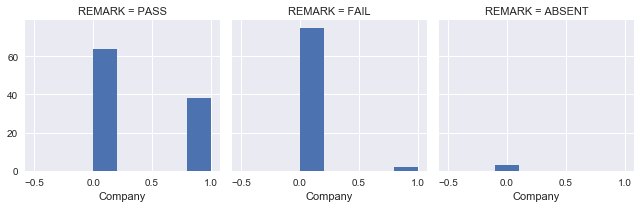

In [9]:
g = sns.FacetGrid(sem_4_2015_merge, col='REMARK')
g.map(plt.hist, 'Company', bins=5)

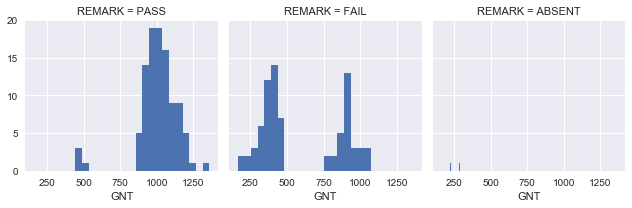

In [10]:
sem_4_2015_merge['GNT'] = sem_4_2015_merge['GNT'].astype(int)

g = sns.FacetGrid(sem_4_2015_merge, col='REMARK')
g.map(plt.hist, 'GNT', bins = 20)

Above plot shows the **discrepancy** between total marks and remark of a student. 

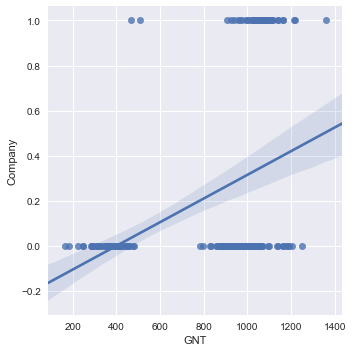

In [11]:
sns.lmplot(y='Company', x='GNT', data=sem_4_2015_merge)